In [1]:
import xgboost
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import pycaret

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("diamonds.csv", index_col = 0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
from pycaret.regression import *
setter = setup(data=df, target="price", train_size=0.7, categorical_features = ['cut', 'color', 'clarity'], remove_outliers = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5560
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(53940, 10)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
get_config("X_train")

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
12708,0.26,61.6,57.0,4.08,4.10,2.52,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6083,1.01,59.4,57.0,6.59,6.57,3.91,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52646,0.24,60.0,57.0,4.07,4.10,2.45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46272,0.54,61.8,54.0,5.22,5.24,3.23,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47873,0.52,61.0,56.0,5.18,5.24,3.18,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.74,61.7,56.0,5.84,5.80,3.59,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52553,0.58,61.5,58.0,5.41,5.38,3.32,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45392,0.54,60.0,58.0,5.30,5.26,3.17,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13510,1.01,63.1,60.0,6.39,6.32,4.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
lgb_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,265.3610,242769.0123,492.7160,0.9839,0.1062,0.0828
1,274.5761,290195.9545,538.6984,0.9810,0.1052,0.0811
2,264.0287,244773.6324,494.7460,0.9837,0.1043,0.0804
3,270.1176,254243.5913,504.2257,0.9833,0.1050,0.0794
4,273.6690,279007.2687,528.2114,0.9809,0.1061,0.0811
5,270.2554,264920.0676,514.7039,0.9819,0.1065,0.0825
6,267.3859,286069.3140,534.8545,0.9805,0.1065,0.0817
7,274.3185,257938.9148,507.8769,0.9834,0.1084,0.0833
8,271.5842,260808.2427,510.6939,0.9828,0.1066,0.0825
9,267.7877,238407.1934,488.2696,0.9845,0.1065,0.0825


In [7]:
predict_model(lgb_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,269.8227,254483.3527,504.4634,0.9833,0.1029,0.0801


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,Label
0,0.34,61.8,58.0,4.47,4.50,2.77,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,596.0,726.3109
1,1.50,63.3,57.0,7.31,7.33,4.63,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9281.0,9100.5058
2,1.27,61.0,59.0,6.96,6.98,4.25,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9547.0,9654.8929
3,1.11,60.8,57.0,6.83,6.77,4.14,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6065.0,6142.2380
4,1.05,61.6,61.0,6.55,6.50,4.02,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5351.0,5763.8594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15368,0.51,61.3,55.0,5.17,5.11,3.15,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1546.0,1502.6621
15369,1.54,62.0,56.0,7.46,7.43,4.61,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14529.0,15249.5649
15370,0.56,61.8,55.0,5.33,5.28,3.28,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2117.0,2046.4041
15371,0.23,62.4,60.0,3.92,3.90,2.44,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,513.0,536.4797


In [8]:
get_config("X_test")

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
12034,0.34,61.8,58.0,4.47,4.50,2.77,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21114,1.50,63.3,57.0,7.31,7.33,4.63,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21444,1.27,61.0,59.0,6.96,6.98,4.25,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15090,1.11,60.8,57.0,6.83,6.77,4.14,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12833,1.05,61.6,61.0,6.55,6.50,4.02,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44026,0.51,61.3,55.0,5.17,5.11,3.15,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25642,1.54,62.0,56.0,7.46,7.43,4.61,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49491,0.56,61.8,55.0,5.33,5.28,3.28,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43920,0.23,62.4,60.0,3.92,3.90,2.44,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


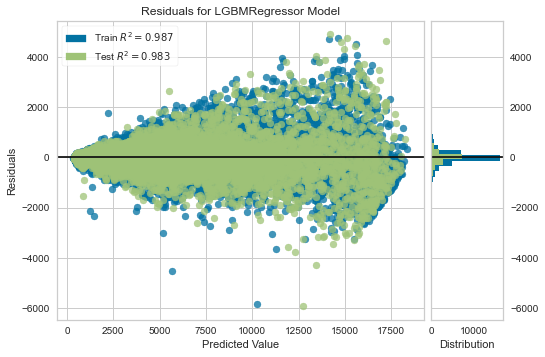

In [9]:
plot_model(lgb_model, plot='residuals')

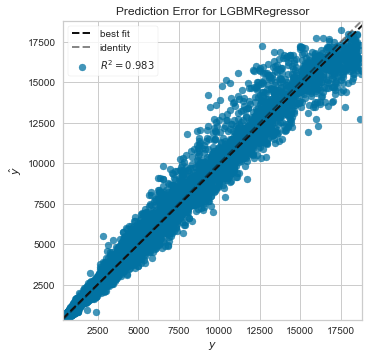

In [10]:
plot_model(lgb_model, plot="error")

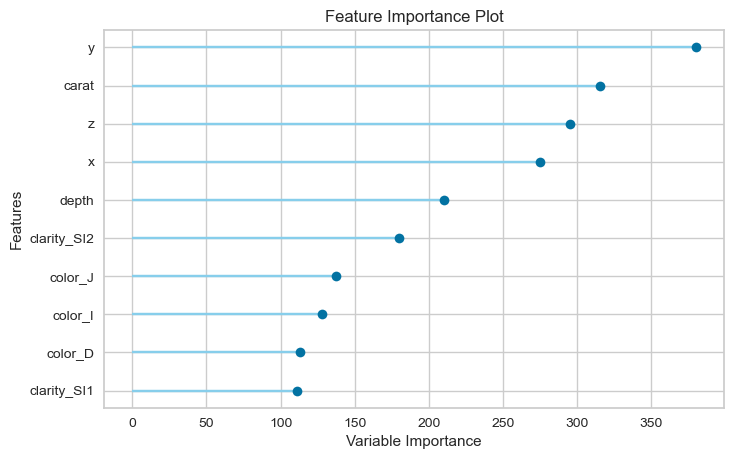

In [11]:
plot_model(lgb_model, plot="feature")

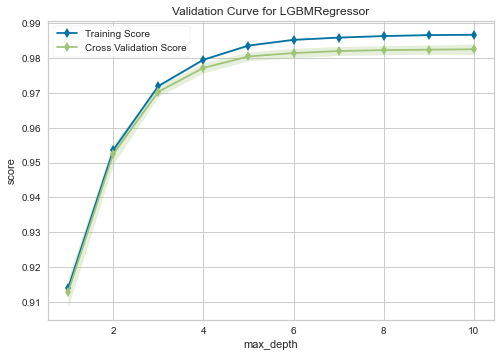

In [12]:
plot_model(lgb_model, plot='vc')

In [13]:
plot_model(lgb_model, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0
n_estimators,100
